In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import PIL as pil
import matplotlib.pyplot as plt
from math import ceil, log2
import plotly.express as px
from util import *
from stats import *

# CIQA

In [3]:
import ciqa

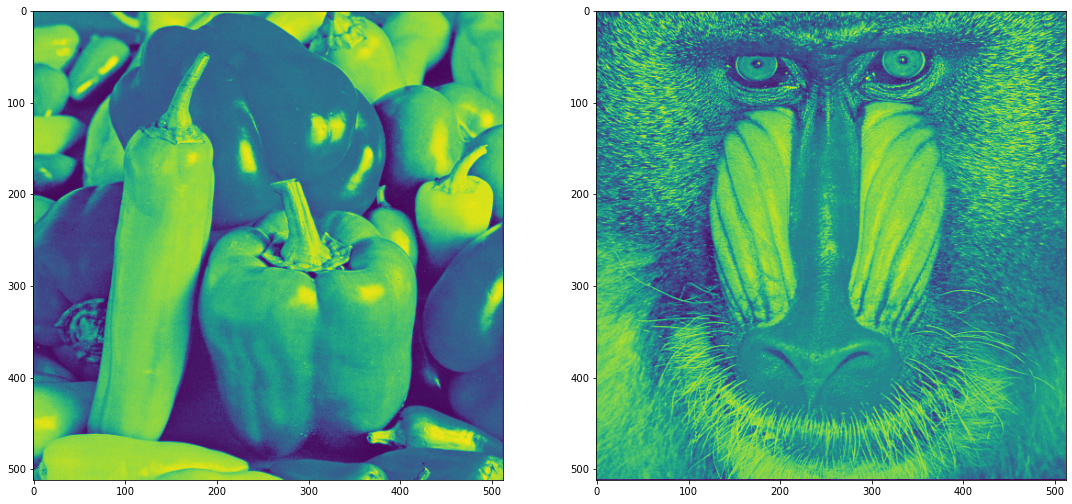

In [4]:
filenames = ['images/peppers.bmp', 'images/baboon.bmp']
images = [pil.Image.open(filename) for filename in filenames]
arrays = [np.asarray(image) for image in images]

fig, ax = plt.subplots(1, len(images))

fig.set_size_inches(18.5, 10.5)

for (i, image) in enumerate(images):
    ax[i].imshow(image)

In [5]:
block_size = 64
levels = 4

decompressed_list = []
for array in arrays:
    data = ciqa.compress(array, block_size, levels)
    decompressed = ciqa.decompress(data)
    decompressed_list.append(decompressed)

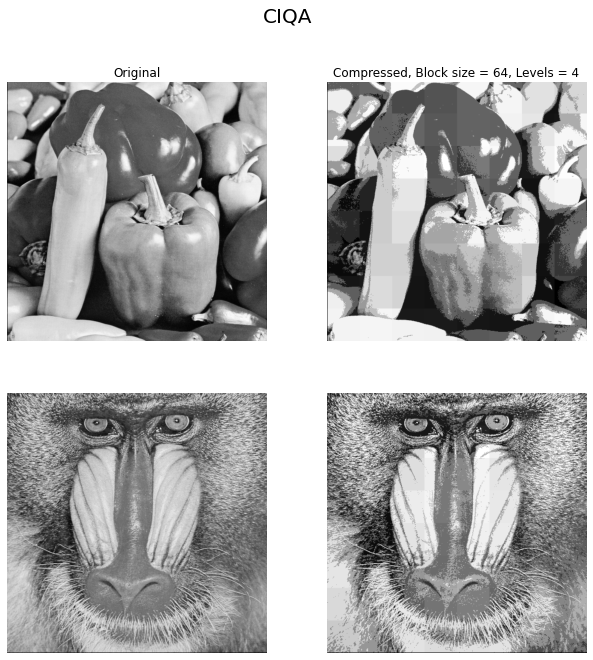

In [6]:
fig, ax = plt.subplots(len(images), 2)

fig.set_size_inches(10.5, 10.5)

ax[0][0].set_title('Original')
ax[0][1].set_title(f'Compressed, Block size = {block_size}, Levels = {levels}')

for i in range(len(images)):
    ax[i][0].axis('off')
    ax[i][1].axis('off')
    ax[i][0].imshow(images[i], cmap='gray')
    ax[i][1].imshow(decompressed_list[i], cmap='gray')
    
    
fig.suptitle('CIQA', fontsize=20)
fig.savefig('result_images/ciqa-comparison.png')

# CIVQ

In [7]:
import civq
from scipy.cluster.vq import kmeans, kmeans2, whiten

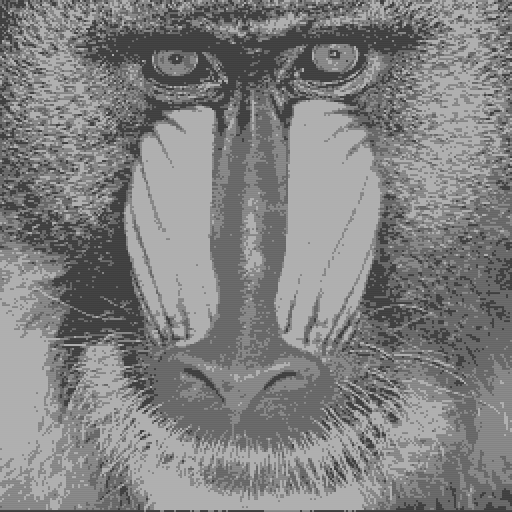

In [8]:
k = 4
block_size = 2
data = civq.compress(array, block_size, k)
decompressed = civq.decompress(data)
pil.Image.fromarray(decompressed)

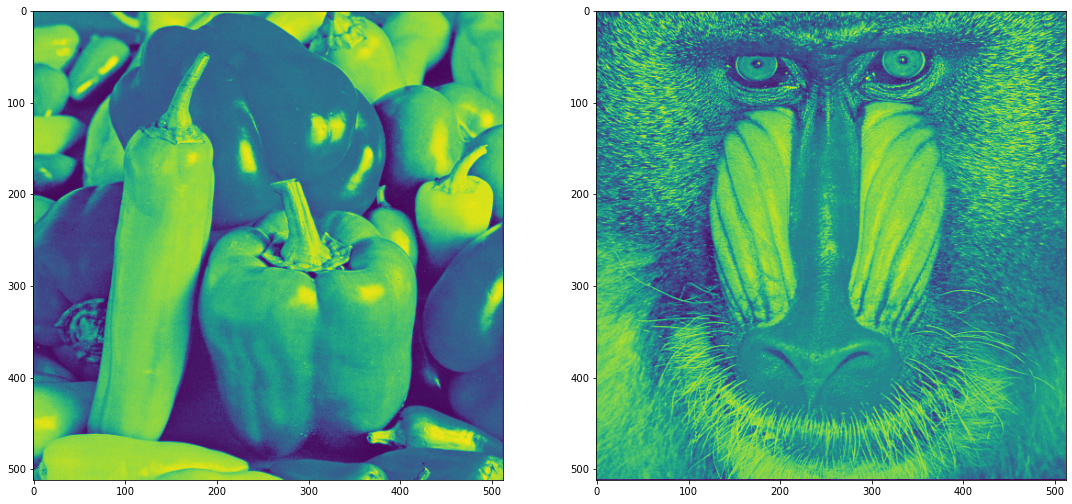

In [9]:
filenames = ['images/peppers.bmp', 'images/baboon.bmp']
images = [pil.Image.open(filename) for filename in filenames]
arrays = [np.asarray(image) for image in images]

fig, ax = plt.subplots(1, len(images))

fig.set_size_inches(18.5, 10.5)

for (i, image) in enumerate(images):
    ax[i].imshow(image)

In [10]:
block_size = 4
levels = 10

decompressed_list = []
for array in arrays:
    data = civq.compress(array, block_size, levels)
    decompressed = civq.decompress(data)
    decompressed_list.append(decompressed)

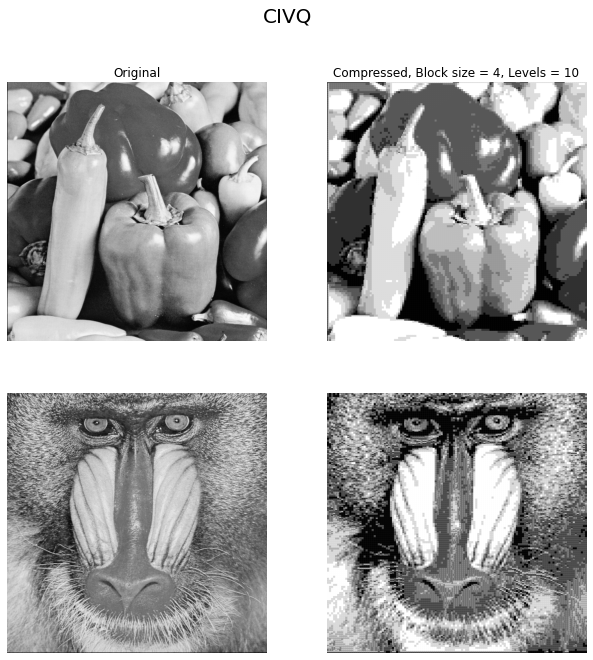

In [11]:
fig, ax = plt.subplots(len(images), 2)

fig.set_size_inches(10.5, 10.5)

ax[0][0].set_title('Original')
ax[0][1].set_title(f'Compressed, Block size = {block_size}, Levels = {levels}')

for i in range(len(images)):
    ax[i][0].axis('off')
    ax[i][1].axis('off')
    ax[i][0].imshow(images[i], cmap='gray')
    ax[i][1].imshow(decompressed_list[i], cmap='gray')
    
    
fig.suptitle('CIVQ', fontsize=20)
fig.savefig('result_images/civq-comparison.png')

# CIMAP

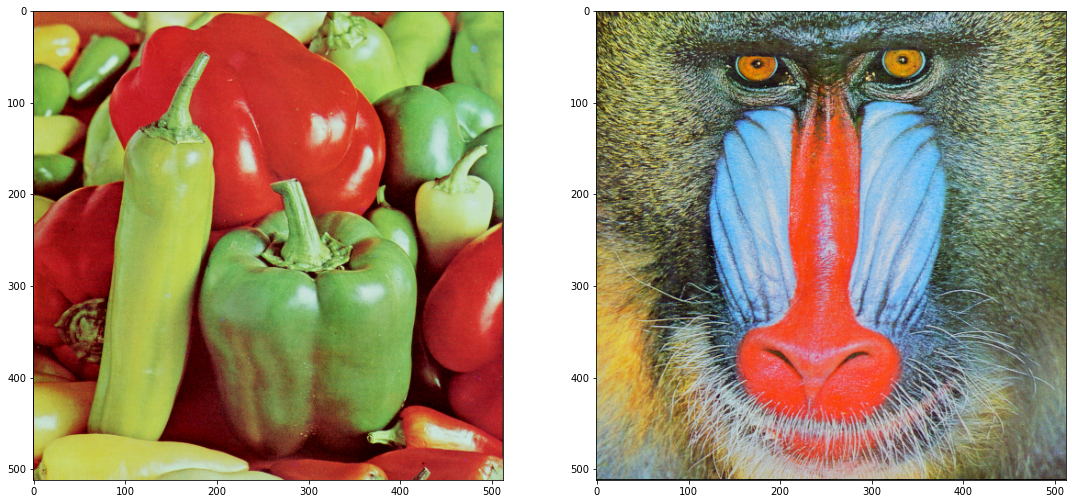

In [12]:
# cimap
import cimap
filenames = ['images/peppers_colour.bmp', 'images/baboon_colour.bmp']
color_images = [pil.Image.open(filename) for filename in filenames]


fig, ax = plt.subplots(1, len(color_images))

fig.set_size_inches(18.5, 10.5)

for (i, color_image) in enumerate(color_images):
    ax[i].imshow(color_image)

In [13]:
color_arrays = [np.asarray(color_image) for color_image in color_images]

k = 8

data_list = [(color_array, cimap.compress(color_array, k)) for color_array in color_arrays]
decompressed_list = [(color_array, cimap.decompress(data)) for (color_array, data) in data_list]

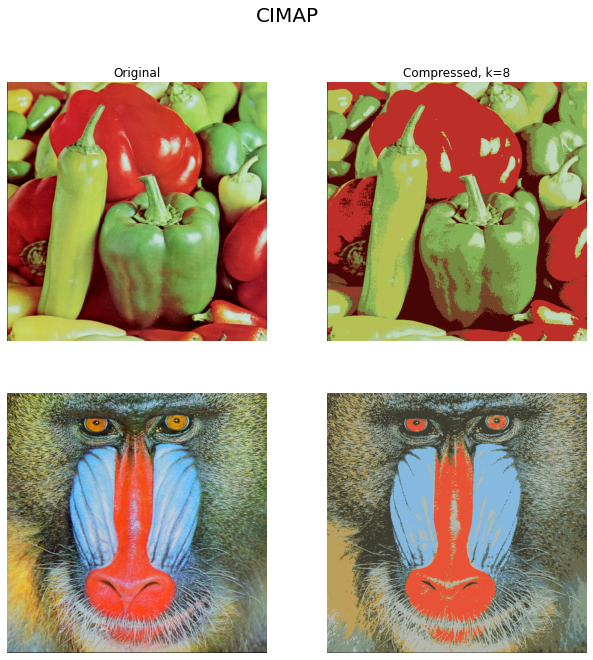

In [14]:
fig, ax = plt.subplots(len(color_images), 2)

fig.set_size_inches(10.5, 10.5)

ax[0][0].set_title('Original')
ax[0][1].set_title(f'Compressed, k={k}')

for (i, (color_array, decompressed)) in enumerate(decompressed_list):
    ax[i][0].axis('off')
    ax[i][1].axis('off')
    ax[i][0].imshow(color_array)
    ax[i][1].imshow(decompressed)
    
    
fig.suptitle('CIMAP', fontsize=20)
fig.savefig('result_images/cimap-comparison.png')

# Dithering

In [15]:
import dithering

In [16]:
dithered_list = []
palette_list = []
for color_array in color_arrays:
    dithered_list.append(dithering.dither(color_array))
    palette_list.append(dithering.fit_to_palette(color_array))

In [17]:
np.all(palette_list[0] == dithered_list[0])

False

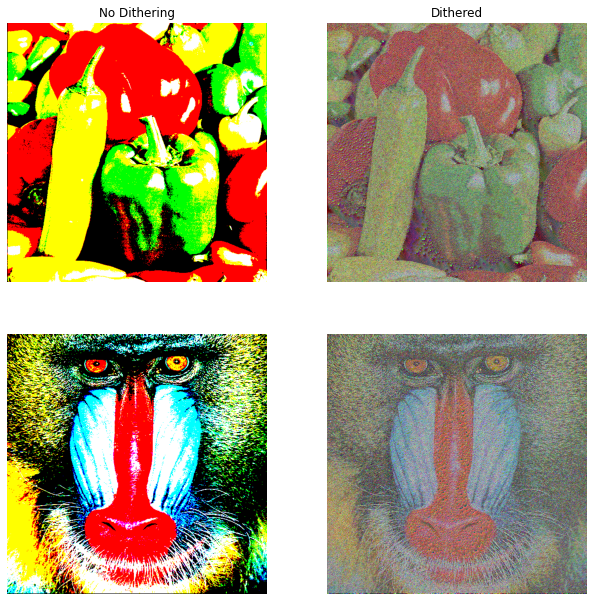

In [18]:
dithered_pairs = list(zip(palette_list, dithered_list))

fig, ax = plt.subplots(len(color_images), 2)

fig.set_size_inches(10.5, 10.5)

ax[0][0].set_title('No Dithering')
ax[0][1].set_title('Dithered')

for (i, (palette, decompressed)) in enumerate(dithered_pairs):
    ax[i][0].axis('off')
    ax[i][1].axis('off')
    ax[i][0].imshow(palette)
    ax[i][1].imshow(decompressed)
    
    
# fig.suptitle('Floyd-Steinberg Dithering', fontsize=24)

fig.savefig('result_images/dithering-vs-no-dithering.png')

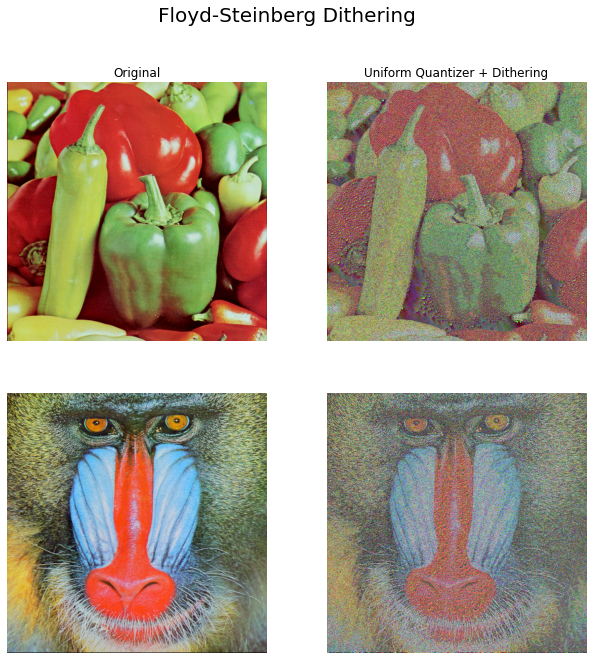

In [19]:
fig, ax = plt.subplots(len(color_images), 2)

fig.set_size_inches(10.5, 10.5)

ax[0][0].set_title('Original')
ax[0][1].set_title('Uniform Quantizer + Dithering')

for (i, color_array) in enumerate(color_arrays):
    ax[i][0].axis('off')
    ax[i][1].axis('off')
    dithered = dithering.dither(color_array)
    ax[i][0].imshow(color_array)
    ax[i][1].imshow(dithered)
    
    
fig.suptitle('Floyd-Steinberg Dithering', fontsize=20)
fig.savefig('result_images/dithering-comparison.png')